<a href="https://colab.research.google.com/github/abirami333-bit/Pcp/blob/main/Intro_to_DA_Lab_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [ ]:
data = pd.read_csv("Medical Appointment.csv")
data.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

In [ ]:
data.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [ ]:
data.shape

(110527, 14)

In [ ]:
data['No-show'] = data['No-show'].map({'Yes': 1, 'No': 0})
data['ScheduledDay'] = pd.to_datetime(data['ScheduledDay'])
data['AppointmentDay'] = pd.to_datetime(data['AppointmentDay'])
data['WaitTime'] = (data['AppointmentDay'] - data['ScheduledDay']).dt.days

# Handle negative wait times if they occur in the full dataset
data.loc[data['WaitTime'] < 0, 'WaitTime'] = 0

print("Initial data cleaning and feature engineering completed.")

Initial data cleaning and feature engineering completed.


# ***Central tendency and dispersion analysis***

In [ ]:
# Print central tendency and dispersion for numerical data (e.g., Age)
print("--- Central Tendency and Dispersion for Age ---")
print(data['Age'].describe())
print("\n")

--- Central Tendency and Dispersion for Age ---
count    110527.000000
mean         37.088874
std          23.110205
min          -1.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64




In [ ]:
# Print central tendency for categorical data (e.g., No-show)
print("--- Frequency Distribution for No-show ---")
print(data['No-show'].value_counts())
print("\n")

--- Frequency Distribution for No-show ---
No-show
0    88208
1    22319
Name: count, dtype: int64




In [ ]:
# Print frequency distribution for Gender
print("--- Frequency Distribution for Gender ---")
print(data['Gender'].value_counts(normalize=True))
print("\n")

--- Frequency Distribution for Gender ---
Gender
F    0.649977
M    0.350023
Name: proportion, dtype: float64




In [ ]:
# Print frequency distribution for Neighbourhood (top 5)
print("--- Top 5 Neighbourhoods ---")
print(data['Neighbourhood'].value_counts().nlargest(5))
print("\n")

--- Top 5 Neighbourhoods ---
Neighbourhood
JARDIM CAMBURI     7717
MARIA ORTIZ        5805
RESISTÊNCIA        4431
JARDIM DA PENHA    3877
ITARARÉ            3514
Name: count, dtype: int64




In [ ]:
# Calculate wait time statistics
print("--- Wait Time Statistics ---")
print(data['WaitTime'].describe())

--- Wait Time Statistics ---
count    110527.000000
mean          9.532739
std          15.027729
min           0.000000
25%           0.000000
50%           3.000000
75%          14.000000
max         178.000000
Name: WaitTime, dtype: float64


# ***Univariate analysis***

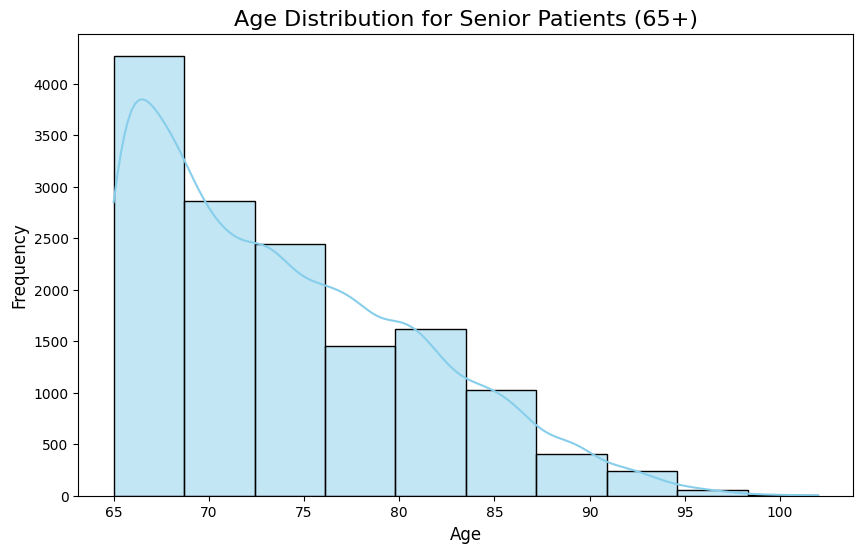

In [ ]:
# Create Age_Group column
bins = [0, 18, 65, 115]
labels = ['Child', 'Adult', 'Senior']
data['Age_Group'] = pd.cut(data['Age'], bins=bins, labels=labels, right=False)

# Age distribution for senior patients
senior_patients = data[data['Age_Group'] == 'Senior']
plt.figure(figsize=(10, 6))
sns.histplot(senior_patients['Age'], bins=10, kde=True, color='skyblue')
plt.title('Age Distribution for Senior Patients (65+)', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

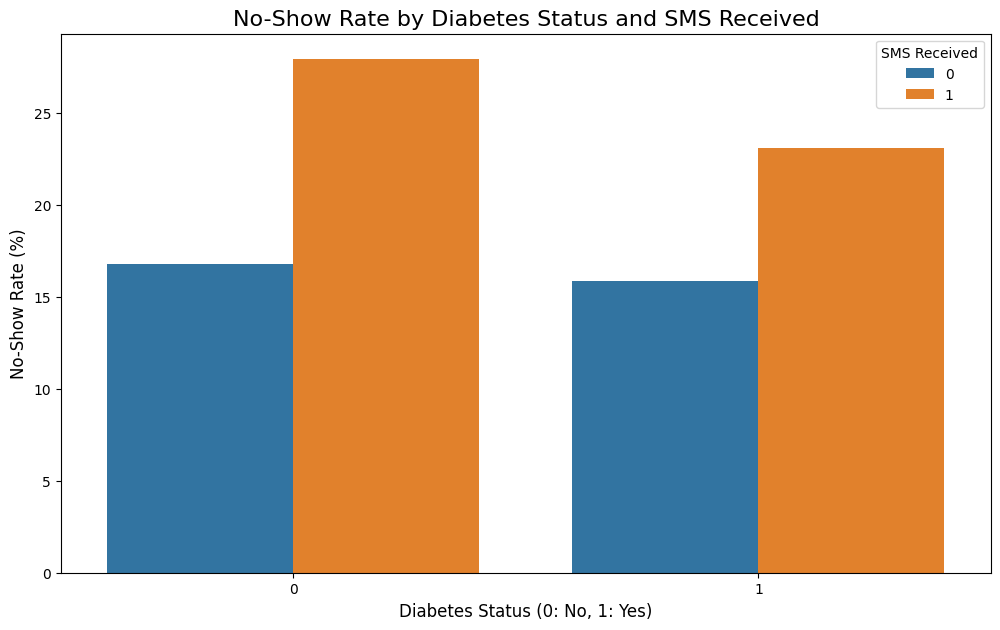

In [ ]:
# No-show rate by SMS received and diabetes status
plt.figure(figsize=(12, 7))
sns.barplot(
    x='Diabetes',
    y='No-show',
    hue='SMS_received',
    data=data,
    estimator=lambda x: sum(x)/len(x) * 100,
    errorbar=None
)
plt.title('No-Show Rate by Diabetes Status and SMS Received', fontsize=16)
plt.xlabel('Diabetes Status (0: No, 1: Yes)', fontsize=12)
plt.ylabel('No-Show Rate (%)', fontsize=12)
plt.legend(title='SMS Received')
plt.show()


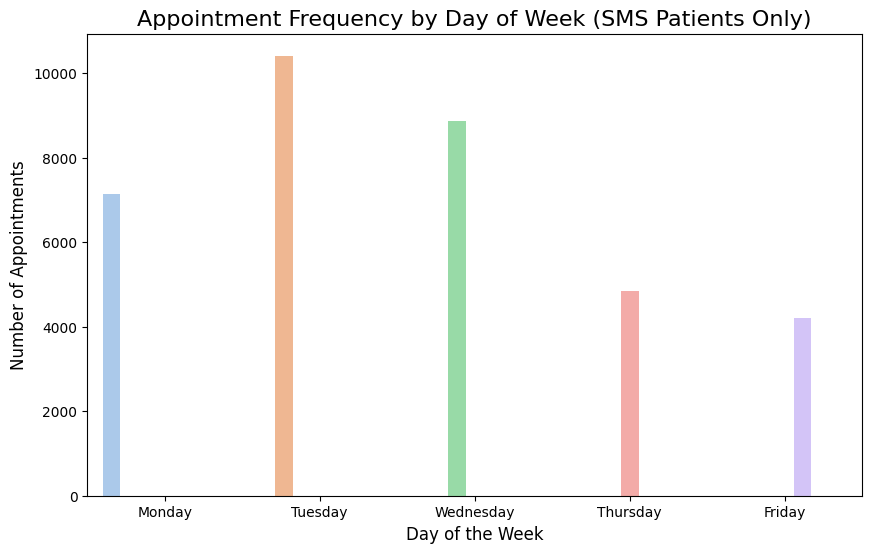

In [ ]:
# Extract the day of the week from 'AppointmentDay'
data['AppointmentDay_of_Week'] = data['AppointmentDay'].dt.day_name()

# Convert to categorical with ordered days
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
data['AppointmentDay_of_Week'] = pd.Categorical(data['AppointmentDay_of_Week'], categories=days_order, ordered=True)

# Appointment day of the week for patients who received an SMS
sms_patients = data[data['SMS_received'] == 1]
plt.figure(figsize=(10, 6))
sns.countplot(x='AppointmentDay_of_Week', data=sms_patients, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'], hue='AppointmentDay_of_Week', palette='pastel', legend=False)
plt.title('Appointment Frequency by Day of Week (SMS Patients Only)', fontsize=16)
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Number of Appointments', fontsize=12)
plt.show()

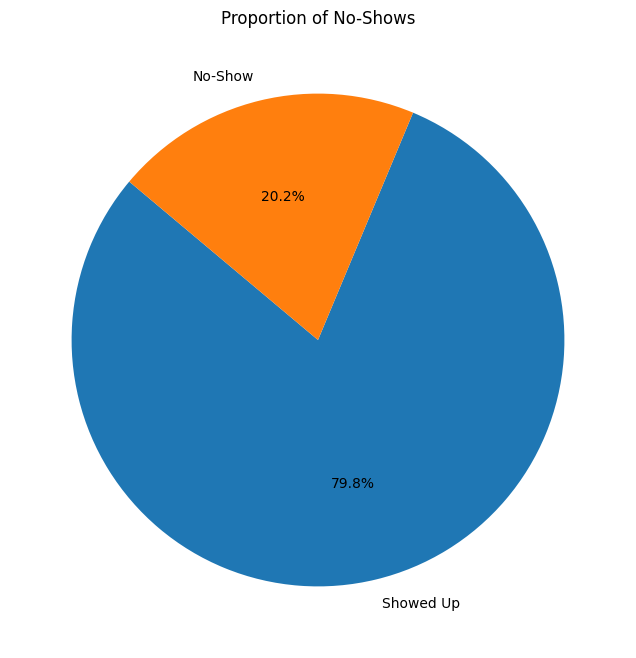

In [ ]:
# No-show proportion
plt.figure(figsize=(8, 8))
no_show_counts = data['No-show'].value_counts()
plt.pie(no_show_counts, labels=no_show_counts.index.map({0: 'Showed Up', 1: 'No-Show'}), autopct='%1.1f%%', startangle=140)
plt.title('Proportion of No-Shows')
plt.show()

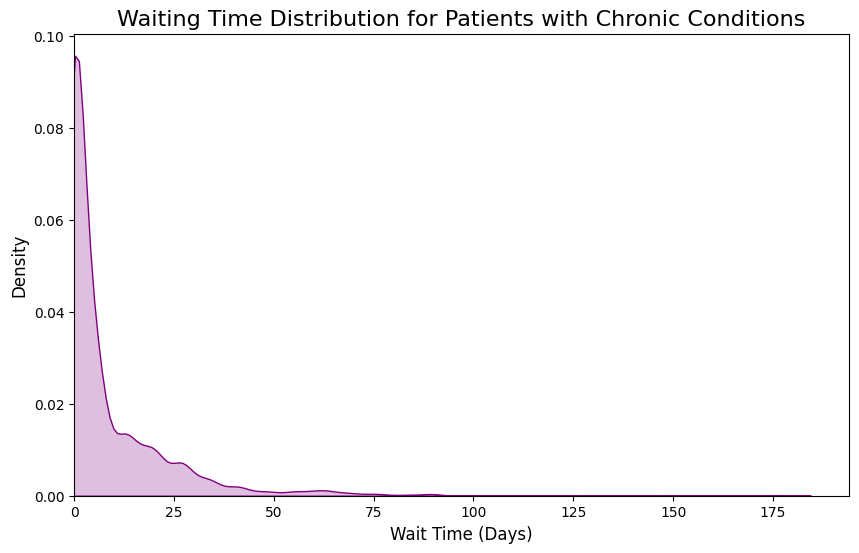

In [ ]:
# waiting time for patients with chronic conditions
chronic_patients = data[(data['Hipertension'] == 1) | (data['Diabetes'] == 1)]
plt.figure(figsize=(10, 6))
sns.kdeplot(data=chronic_patients, x='WaitTime', fill=True, color='purple')
plt.title('Waiting Time Distribution for Patients with Chronic Conditions', fontsize=16)
plt.xlabel('Wait Time (Days)', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.xlim(left=0)
plt.show()


# ***Bivariate analysis***

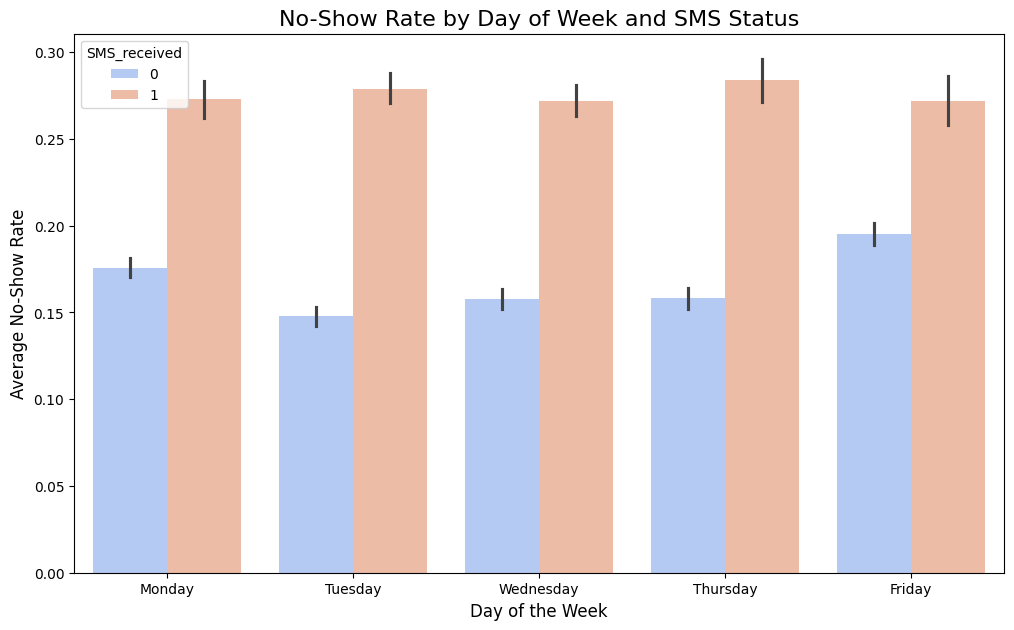

In [ ]:
# No-show rate vs. day of the week, considering SMS received
plt.figure(figsize=(12, 7))
sns.barplot(x='AppointmentDay_of_Week', y='No-show', hue='SMS_received', data=data,
            order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'], palette='coolwarm',
            estimator=lambda x: sum(x)/len(x))
plt.title('No-Show Rate by Day of Week and SMS Status', fontsize=16)
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Average No-Show Rate', fontsize=12)
plt.show()


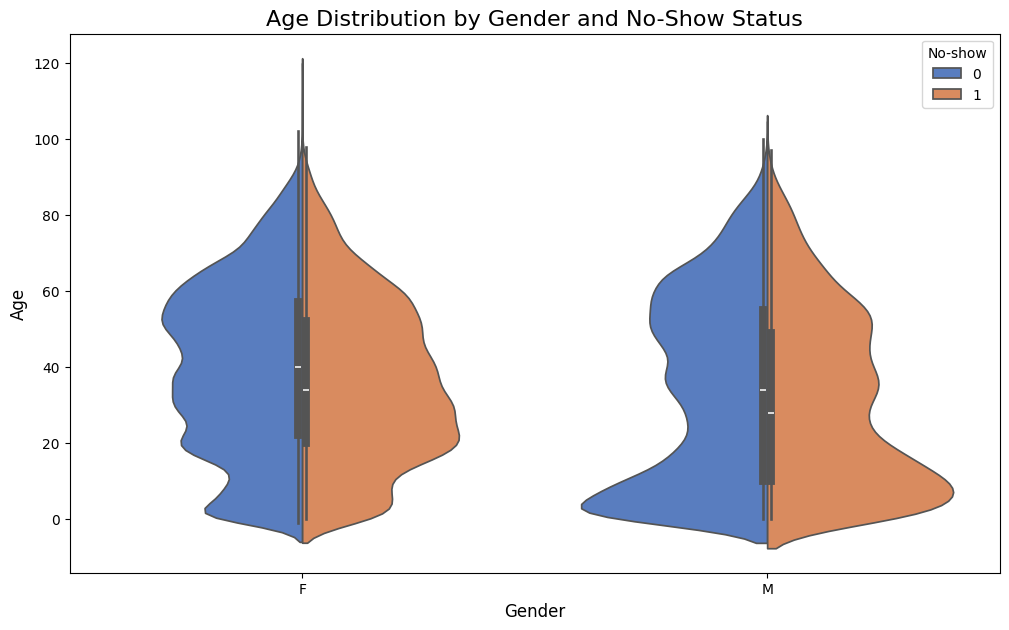

In [ ]:
# Age distribution vs. no-show, split by gender
plt.figure(figsize=(12, 7))
sns.violinplot(x='Gender', y='Age', hue='No-show', data=data, split=True, palette='muted')
plt.title('Age Distribution by Gender and No-Show Status', fontsize=16)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Age', fontsize=12)
plt.show()


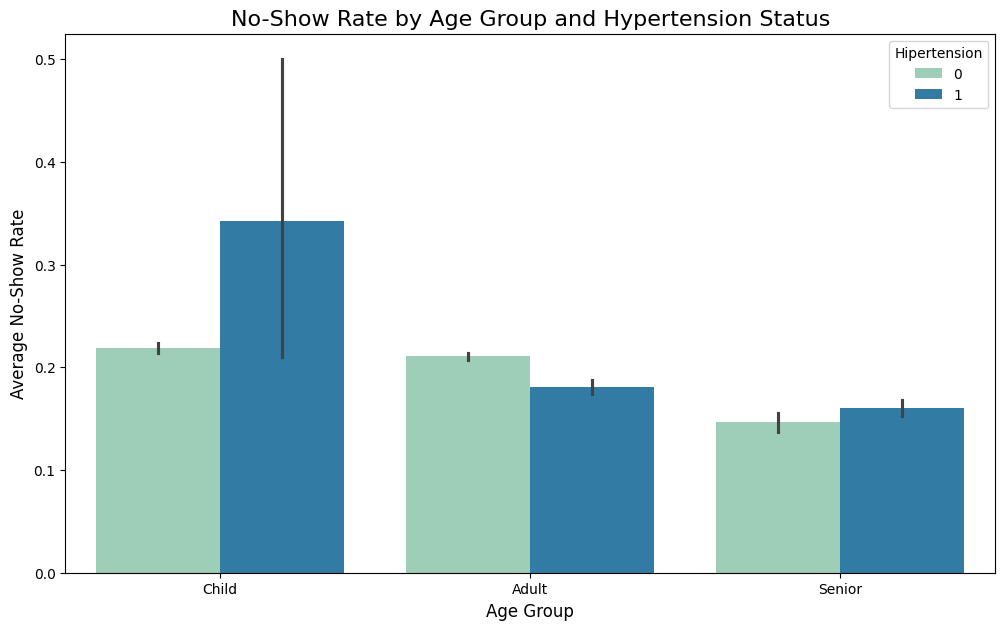

In [ ]:
# No-show rate vs. age group, considering hypertension
plt.figure(figsize=(12, 7))
sns.barplot(x='Age_Group', y='No-show', hue='Hipertension', data=data, palette='YlGnBu')
plt.title('No-Show Rate by Age Group and Hypertension Status', fontsize=16)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Average No-Show Rate', fontsize=12)
plt.show()

/tmp/ipython-input-113780011.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='No-show', y='WaitTime', data=sms_received_only, palette='pastel')


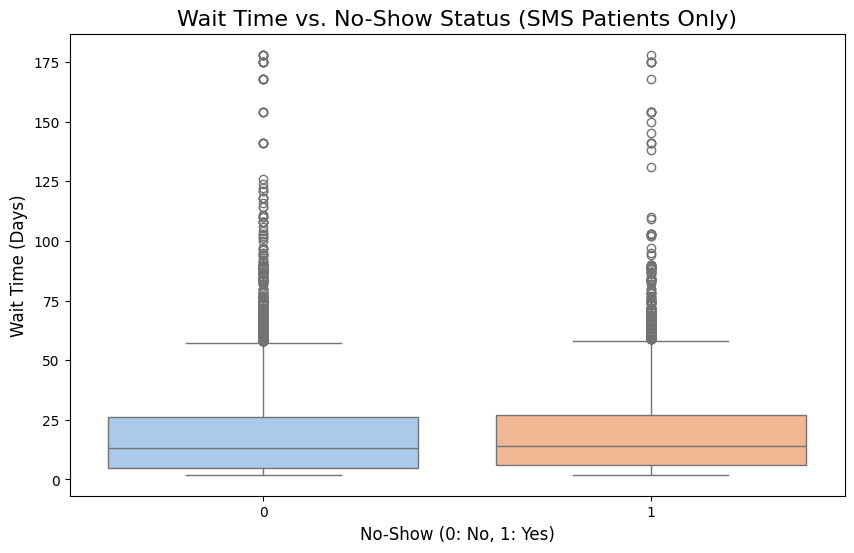

In [ ]:
# Wait time vs. no-show for SMS patients only
sms_received_only = data[data['SMS_received'] == 1]
plt.figure(figsize=(10, 6))
sns.boxplot(x='No-show', y='WaitTime', data=sms_received_only, palette='pastel')
plt.title('Wait Time vs. No-Show Status (SMS Patients Only)', fontsize=16)
plt.xlabel('No-Show (0: No, 1: Yes)', fontsize=12)
plt.ylabel('Wait Time (Days)', fontsize=12)
plt.show()



/tmp/ipython-input-2847420723.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=no_show_rate_by_neighborhood.values, y=no_show_rate_by_neighborhood.index, palette='mako')


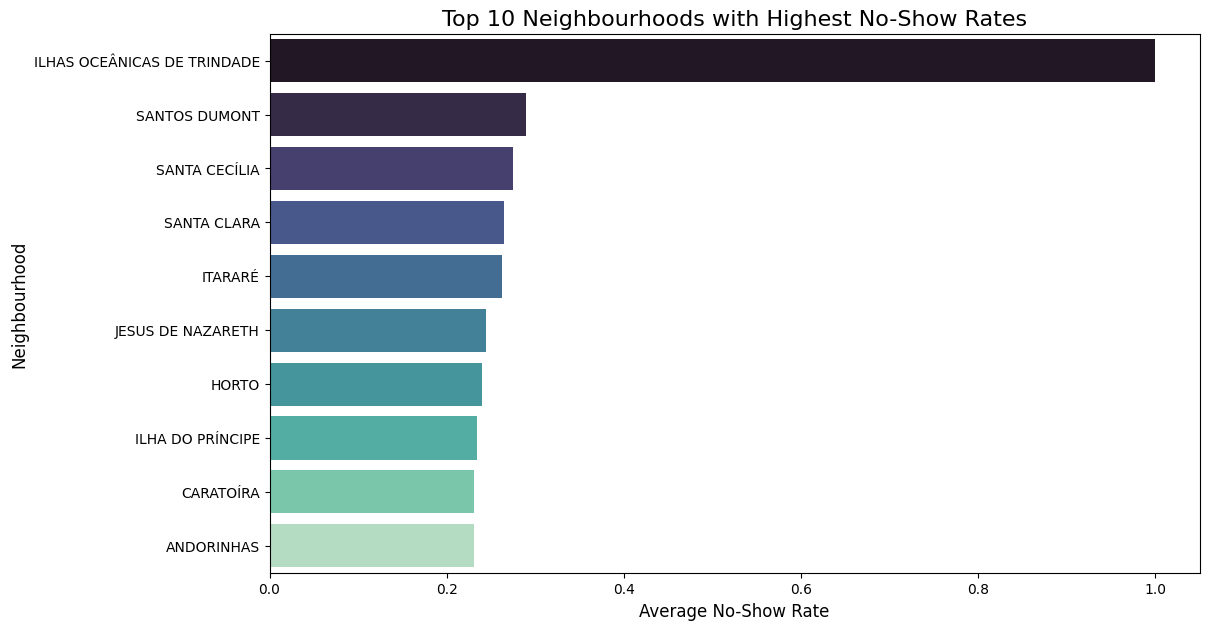

In [ ]:
# Top 10 neighborhoods by no-show rate
no_show_rate_by_neighborhood = data.groupby('Neighbourhood')['No-show'].mean().sort_values(ascending=False).nlargest(10)
plt.figure(figsize=(12, 7))
sns.barplot(x=no_show_rate_by_neighborhood.values, y=no_show_rate_by_neighborhood.index, palette='mako')
plt.title('Top 10 Neighbourhoods with Highest No-Show Rates', fontsize=16)
plt.xlabel('Average No-Show Rate', fontsize=12)
plt.ylabel('Neighbourhood', fontsize=12)
plt.show()


# ***Multivariate analysis***

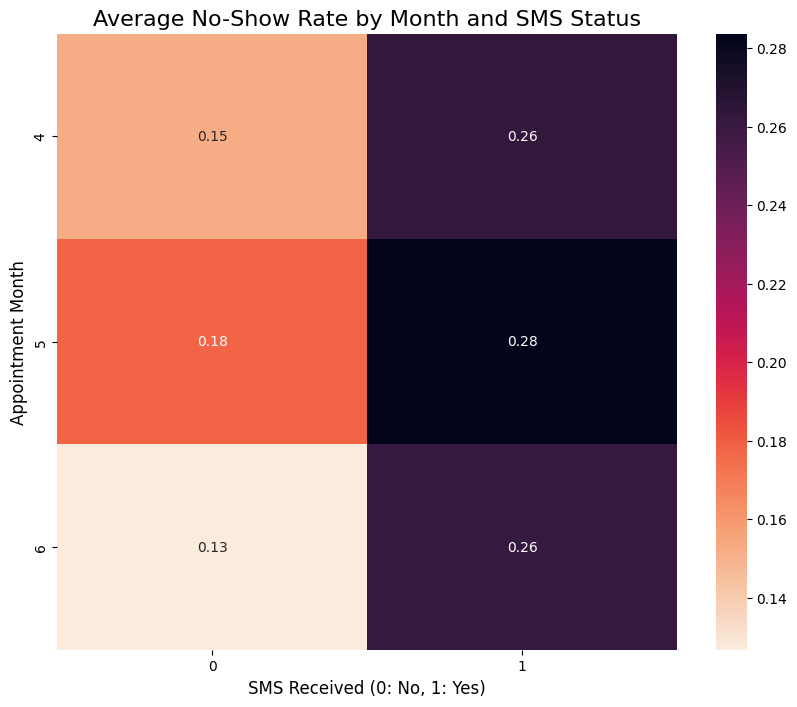

In [ ]:
data['AppointmentMonth'] = data['AppointmentDay'].dt.month
# Average no-show rate by month and SMS status
no_show_pivot = data.pivot_table(index='AppointmentMonth', columns='SMS_received', values='No-show', aggfunc='mean')
plt.figure(figsize=(10, 8))
sns.heatmap(no_show_pivot, annot=True, cmap='rocket_r', fmt=".2f")
plt.title('Average No-Show Rate by Month and SMS Status', fontsize=16)
plt.xlabel('SMS Received (0: No, 1: Yes)', fontsize=12)
plt.ylabel('Appointment Month', fontsize=12)
plt.show()

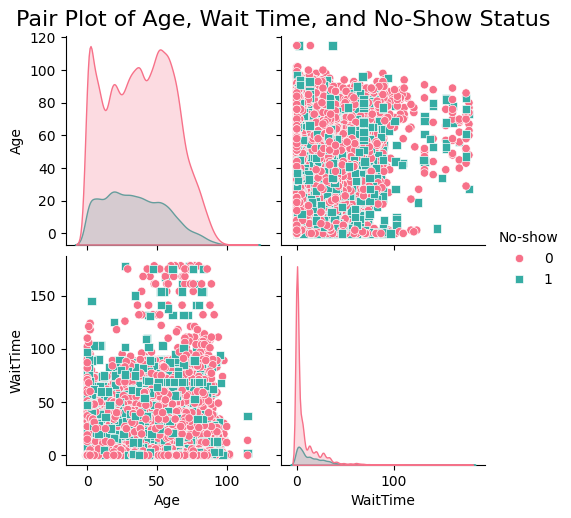

In [ ]:
# Pair plot of key variables
sns.pairplot(data, vars=['Age', 'WaitTime'], hue='No-show', palette='husl', markers=["o", "s"])
plt.suptitle('Pair Plot of Age, Wait Time, and No-Show Status', y=1.02, fontsize=16)
plt.show()

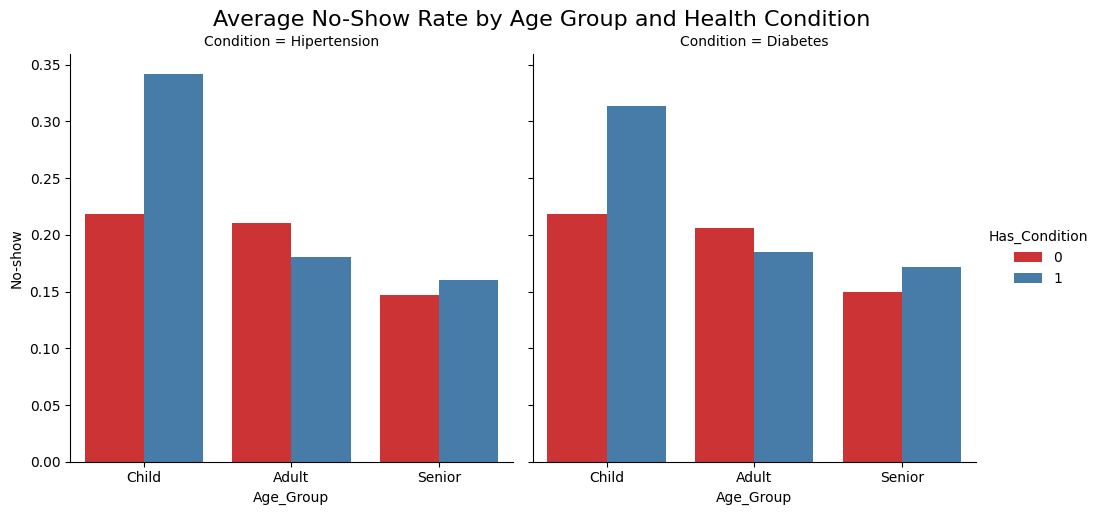

In [ ]:
#  Average no-show rate by age group and health conditions
melted_health = data.melt(id_vars=['No-show', 'Age_Group'], value_vars=['Hipertension', 'Diabetes'],
                         var_name='Condition', value_name='Has_Condition')
sns.catplot(x='Age_Group', y='No-show', hue='Has_Condition', col='Condition', data=melted_health,
            kind='bar', palette='Set1', errorbar=None, height=5)
plt.suptitle('Average No-Show Rate by Age Group and Health Condition', y=1.02, fontsize=16)
plt.show()

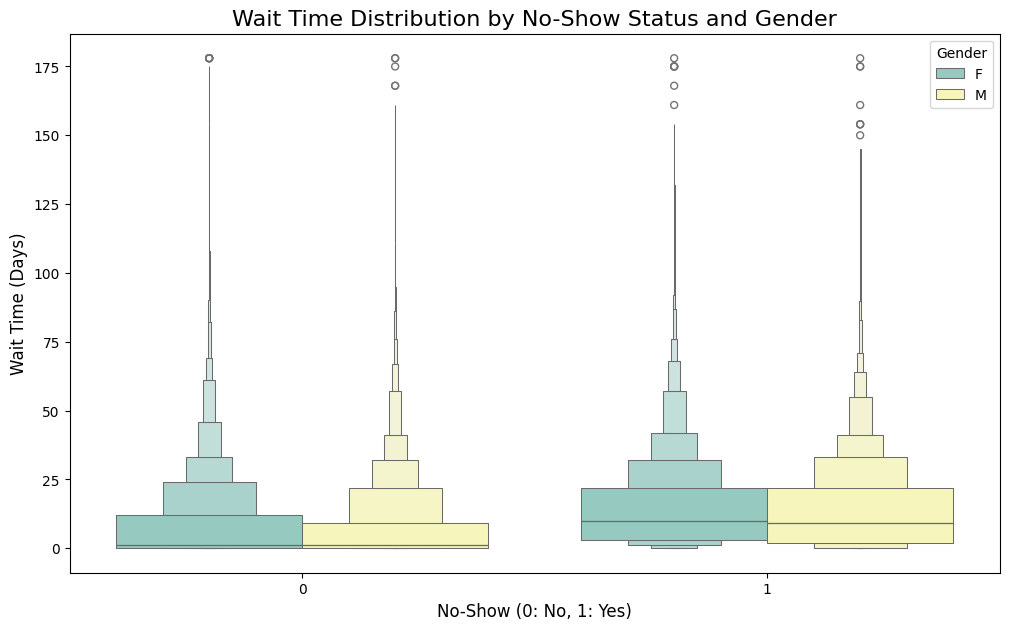

In [ ]:
# Wait time distribution vs. no-show and gender
plt.figure(figsize=(12, 7))
sns.boxenplot(x='No-show', y='WaitTime', hue='Gender', data=data, palette='Set3')
plt.title('Wait Time Distribution by No-Show Status and Gender', fontsize=16)
plt.xlabel('No-Show (0: No, 1: Yes)', fontsize=12)
plt.ylabel('Wait Time (Days)', fontsize=12)
plt.show()

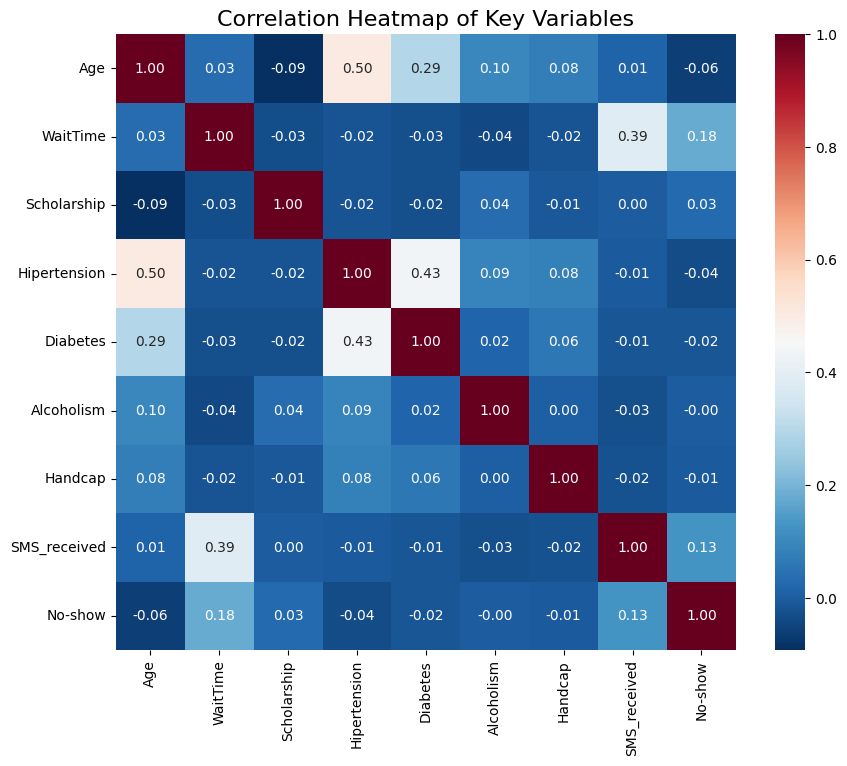

In [ ]:
# Correlation heatmap of key variables
numerical_vars = ['Age', 'WaitTime', 'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show']
plt.figure(figsize=(10, 8))
sns.heatmap(data[numerical_vars].corr(), annot=True, cmap='RdBu_r', fmt=".2f")
plt.title('Correlation Heatmap of Key Variables', fontsize=16)
plt.show()